## Students Information

Please enter the names and IDs of the two students below:

1. **Name**: Eman Ibrahim Elbedwihy
   **ID**: `9210265`

2. **Name**: Sara Gamal Gerges
   **ID**: `9210455`


## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this assignment. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated email @ noran.mostafa00@eng-st.cu.edu.eg Make sure you meet the submission deadline to avoid any late penalties.


We look forward to seeing your completed assignments and wish you the best of luck!


## Installation Instructions

In this lab assignment, we require additional Python libraries for machine learning (ML) and deep learning (DL) algorithms and frameworks. To fulfill these requirements, we need to install Pytorch.
1. Install Pytorch \
PyTorch is a versatile and powerful machine learning library for Python, known for its flexibility and ease of use in research and production. It supports various deep learning operations and models, including convolutional and recurrent neural networks. For Windows users, the installation also requires ensuring that CUDA, provided by NVIDIA, is compatible to enable GPU acceleration. This enhances performance significantly, particularly in training large neural networks.\
For windows installation with GPU support you can [check out this link](https://pytorch.org/get-started/locally/) which is the source for the command below and please know that support for GPU is done for windows so you can also check out [previous versions](https://pytorch.org/get-started/previous-versions/), you could use CPU on windows smoothly, use linux or resort to [WSL](https://www.youtube.com/watch?v=R4m8YEixidI).

```bash
pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
```
```bash
conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
```


> **Note:** You are allowed to install any other necessary libraries you deem useful for solving the lab. Please ensure that any additional libraries are compatible with the assignment requirements and are properly documented in your submission.


## U-Net

U-Net is a convolutional neural network designed specifically for biomedical image segmentation. First introduced in a 2015 paper by Olaf Ronneberger, Philipp Fischer, and Thomas Brox, its architecture is notably shaped like the letter "U", which inspired its name. This structure comprises a contracting path to capture context and a symmetrically expanding path that aids in precise localization, making it particularly adept at leveraging small datasets to achieve highly accurate segmentations. U-Net's ability to accurately segment various tissues and medical conditions has made it a staple in medical imaging and has spurred adaptations for broader image analysis applications. Its success in the medical domain demonstrates its potential for high-impact applications in other fields requiring detailed image segmentation.

U-Net's robust architecture has found significant applications in the field of satellite imaging as well. The ability of U-Net to effectively handle multi-scale and high-resolution images makes it particularly suitable for satellite image analysis. In satellite imaging, U-Net is commonly used for tasks such as land cover classification, road detection, and building segmentation. Its structure allows for precise segmentation of complex objects from high-resolution satellite imagery, even with relatively limited labeled datasets. This capability is crucial in environmental monitoring, urban planning, and disaster management, where accurate and detailed image analysis is required. The adaptability and efficiency of U-Net in handling spatial hierarchies and various textures present in satellite images highlight its versatility and effectiveness beyond its initial medical context.



### U-Net Architecture

![U-Net Architecture](unet.jpg)

### Detailed Overview of Functions in `utilities.py`

The `utilities.py` file contains multiple functions to support image processing, data manipulation, and neural network training:

- **`generate_random_data(height, width, count)`**:
  - Generates random images and masks.

- **`generate_img_and_mask(height, width)`**:
  - Generates a single image and corresponding mask.

- **`add_square(img, mask)`**:
  - Adds a square to an image and updates the mask.

- **`add_filled_square(img, mask)`**:
  - Adds a filled square to an image and updates the mask.

- **`logical_and(mask1, mask2)`**:
  - Performs logical 'AND' operation between two masks.

- **`add_mesh_square(img, mask)`**:
  - Adds a mesh-patterned square to an image and updates the mask.

- **`add_triangle(img, mask)`**:
  - Adds a triangle to an image and updates the mask.

- **`add_circle(img, mask)`**:
  - Adds a circle to an image and updates the mask.

- **`add_plus(img, mask)`**:
  - Adds a plus sign to an image and updates the mask.

- **`get_random_location(shape, zoom)`**:
  - Gets a random location within an image shape.

- **`plot_img_array(img_array, n_col)`**:
  - Plots an array of images.

- **`plot_side_by_side(img_arrays)`**:
  - Plots images side by side for comparison.

- **`plot_errors(train_losses, val_losses)`**:
  - Plots training and validation loss errors.

- **`masks_to_colorimg(masks)`**:
  - Converts masks to colored images.

- **`generate_images_and_masks_then_plot()`**:
  - Generates images and masks and plots them.

- **`reverse_transform(transform)`**:
  - Reverses a transformation applied to an image.

- **`get_data_loaders(train_dir, valid_dir, batch_size)`**:
  - Gets data loaders for training and validation datasets.

- **`dice_loss(inputs, targets, smooth)`**:
  - Calculates Dice loss for model evaluation.

- **`calc_loss(pred, target, metrics)`**:
  - Calculates loss and updates metrics.

- **`print_metrics(metrics, epoch_samples, phase)`**:
  - Prints metrics for training or validation phases.

- **`train_model(model, dataloaders, criterion, optimizer, num_epochs)`**:
  - Trains a model given data loaders and training parameters.

- **`run(model)`**:
  - Runs a full model training and evaluation session.

- **`__init__`, `__len__`, `__getitem__`**:
  - Standard class methods used in Python classes, typically for data handling or model initialization.

These functions collectively facilitate the full lifecycle of processing, training, and evaluating neural network models, particularly focusing on image-related tasks.


The primary objective of this assignment is to develop a neural network model capable of performing accurate image segmentation. Image segmentation involves dividing an image into segments that represent different objects or regions, which is crucial in various applications such as medical imaging, autonomous driving, and satellite image analysis.

#### Image and Mask Generation
In this assignment, synthetic images along with corresponding segmentation masks are generated to train and evaluate the segmentation model. Each image typically includes multiple geometric shapes placed randomly. These shapes can include simple forms such as circles, squares, and triangles, or more complex designs.

#### Masks and Their Role in Segmentation
- **Mask Generation**: Alongside each synthetic image, a mask is generated where each shape in the image has a corresponding segment in the mask. Each segment in the mask is represented by a unique color or grayscale intensity, where each intensity level corresponds to a different class (shape).
- **Function of the Mask**: The mask serves as a "ground truth" for training the segmentation model. The model learns to predict these masks from the input images. Essentially, the task of the model is to map the input image to its corresponding output mask, segmenting the shapes it has learned during training.
- **Learning Process**: During training, the model adjusts its parameters to minimize the difference between its predicted masks and the ground truth masks. This process involves optimizing a loss function, typically using backpropagation.


## Requirement - U-Net Application
- **Implement or Use U-Net**:
  - **Option 1: Implementation** - Students are encouraged to implement the U-Net architecture from scratch, including defining all the layers and connections based on the standard specifications found in the literature.
  - **Option 2: Use Pre-existing Implementation** - Students may also opt to use an existing implementation of U-Net. This can include adapting an open-source model available in frameworks like PyTorch.

- **Integration with `utilities.py`**:
  - The U-Net model, whether self-implemented or pre-existing, must be integrated with the `utilities.py` script provided. This integration is essential for processing data, training the model, and evaluating its performance efficiently.
  - The model should effectively process input images and produce accurate segmentation masks as output, corresponding to the different segments of the input images.
  - **You can make any necessary modifications including writing your own training loop for example**.


In [2]:
# import libraries here
import torch
import torch.nn as nn
from torchvision import models
import utilities
from itertools import product

In [3]:
class DoubleConv(nn.Module):

    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),

            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.conv(x)


In [4]:
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()

        self.down1 = DoubleConv(in_channels, 64)
        self.pool1 = nn.MaxPool2d(2)

        self.down2 = DoubleConv(64, 128)
        self.pool2 = nn.MaxPool2d(2)

        self.down3 = DoubleConv(128, 256)
        self.pool3 = nn.MaxPool2d(2)

        self.down4 = DoubleConv(256, 512)
        self.pool4 = nn.MaxPool2d(2)

        self.bottleneck = DoubleConv(512, 1024)

        self.up4 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.conv4 = DoubleConv(1024, 512)

        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.conv3 = DoubleConv(512, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.conv2 = DoubleConv(256, 128)

        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.conv1 = DoubleConv(128, 64)

        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        # Encoder
        d1 = self.down1(x)
        p1 = self.pool1(d1)

        d2 = self.down2(p1)
        p2 = self.pool2(d2)

        d3 = self.down3(p2)
        p3 = self.pool3(d3)

        d4 = self.down4(p3)
        p4 = self.pool4(d4)

        # Bottleneck
        bn = self.bottleneck(p4)

        # Decoder
        up4 = self.up4(bn)
        cat4 = torch.cat([up4, d4], dim=1)
        d4 = self.conv4(cat4)

        up3 = self.up3(d4)
        cat3 = torch.cat([up3, d3], dim=1)
        d3 = self.conv3(cat3)

        up2 = self.up2(d3)
        cat2 = torch.cat([up2, d2], dim=1)
        d2 = self.conv2(cat2)

        up1 = self.up1(d2)
        cat1 = torch.cat([up1, d1], dim=1)
        d1 = self.conv1(cat1)

        out = self.final_conv(d1)

        return out

In [5]:

dataloaders = utilities.get_data_loaders()
learning_rates=[0.01,0.001,0.0001]
num_epochs_list=[30,60,90]
step_size_list=[20,30,40]
best_val_loss = 1e10
best_model=None
best_params = {}
for step_size, lr, num_epochs in product(step_size_list, learning_rates, num_epochs_list):
    print(f"Training with Step Size: {step_size}, Learning Rate: {lr}, Epochs: {num_epochs}")
    model,val_loss=utilities.run(dataloaders,UNet,lr,step_size,num_epochs)
    if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model=model
            best_params = {"step_size": step_size, "learning_rate": lr, "num_epochs": num_epochs}

print("Best Parameters:", best_params)
print("Best Validation Loss:", best_val_loss)



Training with Step Size: 20, Learning Rate: 0.01, Epochs: 30
Epoch 0/29
----------
LR 0.01


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Streaming output truncated to the last 5000 lines.
val: bce: 0.022391, dice: 0.659481, loss: 0.340936
saving best model
0m 3s
Epoch 83/89
----------
LR 1e-05
train: bce: 0.022597, dice: 0.640831, loss: 0.331714
val: bce: 0.022357, dice: 0.659091, loss: 0.340724
saving best model
0m 3s
Epoch 84/89
----------
LR 1e-05
train: bce: 0.022566, dice: 0.640528, loss: 0.331547
val: bce: 0.022327, dice: 0.658818, loss: 0.340572
saving best model
0m 3s
Epoch 85/89
----------
LR 1e-05
train: bce: 0.022534, dice: 0.640256, loss: 0.331395
val: bce: 0.022301, dice: 0.658599, loss: 0.340450
saving best model
0m 3s
Epoch 86/89
----------
LR 1e-05
train: bce: 0.022500, dice: 0.639933, loss: 0.331216
val: bce: 0.022289, dice: 0.658474, loss: 0.340382
saving best model
0m 3s
Epoch 87/89
----------
LR 1e-05
train: bce: 0.022471, dice: 0.639531, loss: 0.331001
val: bce: 0.022260, dice: 0.658275, loss: 0.340267
saving best model
0m 3s
Epoch 88/89
----------
LR 1e-05
train: bce: 0.022440, dice: 0.639219, loss

(25, 6, 192, 192)
Dice Score =  0.9203510284423828
Jaccard Index =  0.8797322511672974


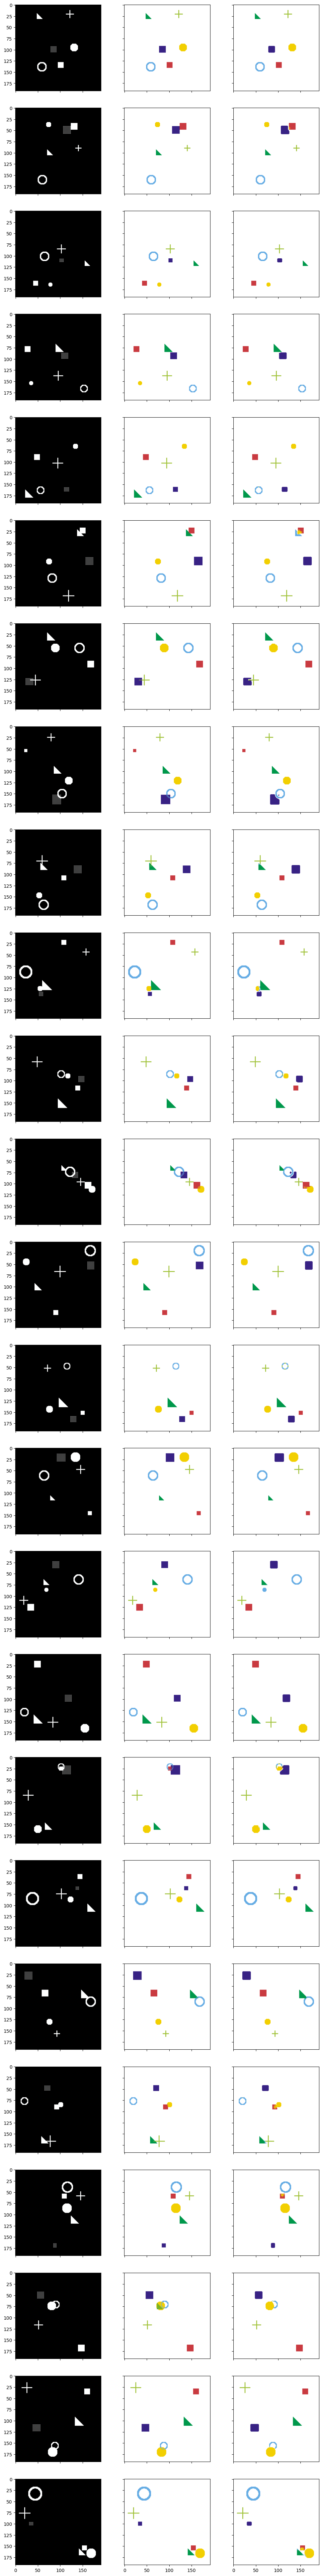

In [8]:
utilities.test(best_model,dataloaders['test'])

### Grading Rubric (Total: 10 Marks)

The lab is graded based on the following criteria:

1. **Data Loading and Preparation (1 Mark)**
   - Ensure reproducible results by setting seed to `27` before all randomized operations. (1 Mark)
   
2. **U-Net Architecture (4 Marks)**
   - Uses appropriate U-Net Architecture to the problem with a full pipeline. (4 Marks)

3. **Hyperparameters Tuning (2 Marks)**
   - Report evaluation metrics on validation set. (1 Mark)
   - Analyzes results and tunes hyperparameters. (1 Mark)
  
4. **Model Evaluation and Understanding (3 Marks)**
   - Reports Jaccard Index and Dice Scores for test set. (3 Mark)

Each section of the lab will be evaluated on completeness, and correctness in approach and analysis. Part of the rubric also includes the student's ability to explain and justify their choices and results.
